<a href="https://colab.research.google.com/github/adhish-bahl/2347203_NNDL_Lab/blob/main/2347203_NNDL_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Dataset**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### **1. Dataset Overview and Visualization**

**Load the Fashion-MNIST dataset and definig the classes**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Normalize the images for faster training**

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

**Visualize a few samples with their labels**

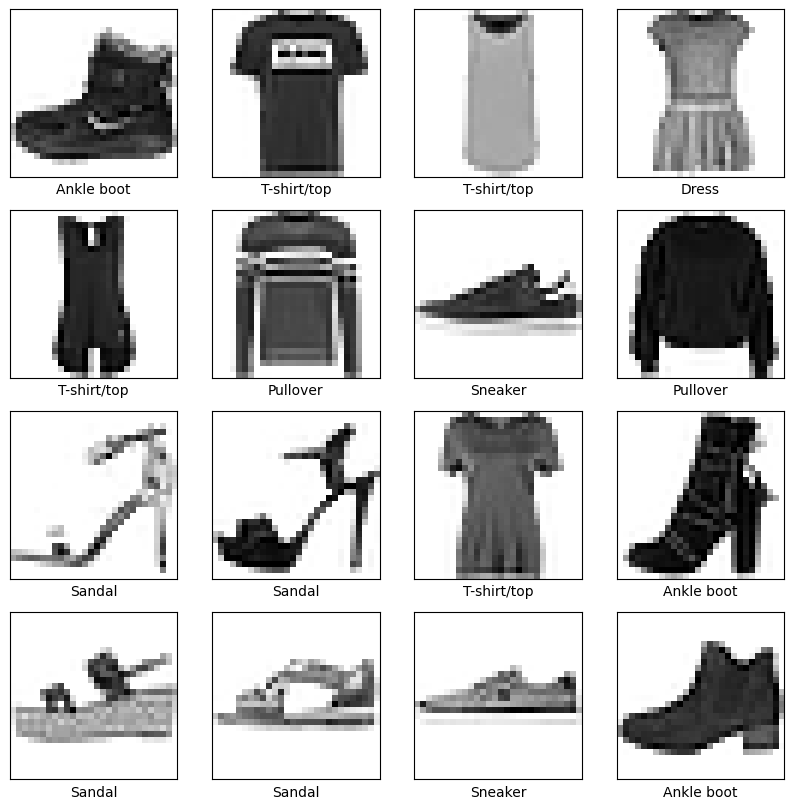

In [ ]:
def plot_sample_images():
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y_train[i]])
    plt.show()

plot_sample_images()

#### **2. Definig CNN model architecture**

In [ ]:
def create_cnn_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

This model is a Convolutional Neural Network (CNN) designed for image classification. It begins with three convolutional layers, each followed by batch normalization and max-pooling. The first convolutional layer takes grayscale images with a shape of (28, 28, 1) and applies 32 filters, resulting in a feature map of size (26, 26, 32).

#### **3. Model Training**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 44ms/step - accuracy: 0.7492 - loss: 0.7186 - val_accuracy: 0.8272 - val_loss: 0.4646
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8570 - loss: 0.3951 - val_accuracy: 0.8660 - val_loss: 0.3514
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.8736 - loss: 0.3457 - val_accuracy: 0.8690 - val_loss: 0.3585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.8878 - loss: 0.3029 - val_accuracy: 0.8691 - val_loss: 0.3822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 44ms/step - accuracy: 0.8993 - loss: 0.2767 - val_accuracy: 0.8838 - val_loss: 0.3140
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.9077 - loss: 0.2548 - val_accuracy: 0.8923 - val_loss: 0.2970
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.9146 - loss: 0.2362 - val_accuracy: 0.8890 - val_loss: 0.3234
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9

#### **4. Evaluation**

**cCalculating Accuracy**

313/313 - 4s - 14ms/step - accuracy: 0.8895 - loss: 0.3324
Test Accuracy: 0.8895000219345093


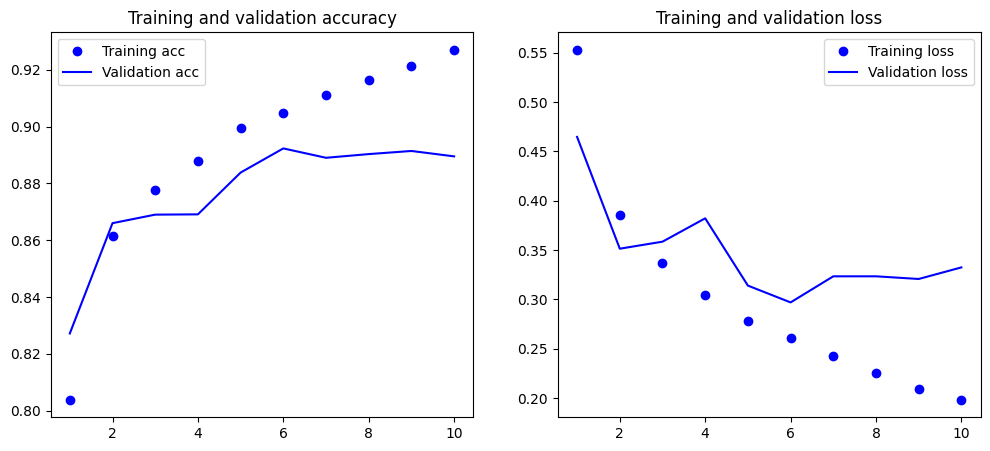

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)

The model is performing well, with nearly 89% accuracy, suggesting it has learned effective features for distinguishing between classes. To improve further, techniques such as hyperparameter tuning, additional data augmentation, or trying more complex architectures could be explored.

The provided graphs display the model's performance across 10 epochs in terms of accuracy and loss for both the training and validation sets. The training accuracy consistently increases throughout the epochs, eventually exceeding 92%, which indicates that the model is learning the patterns in the training data effectively.

On the loss side, the training loss steadily decreases as the model minimizes its error on the training set, which is expected during effective learning. The validation loss also declines at first but fluctuates after the third epoch, while generally remaining higher than the training loss.

**Ploting thr confusion matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


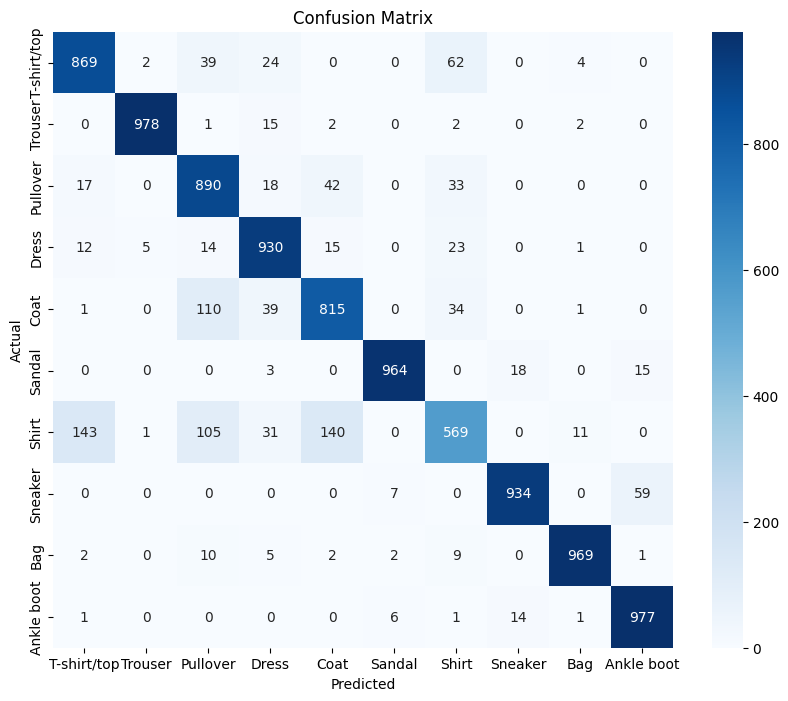

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

While the model shows strong performance in several categories, it still has difficulties distinguishing between visually similar clothing items, particularly Shirts, T-shirts, and Pullovers. This indicates a potential area for further fine-tuning or more advanced feature extraction to improve classification accuracy for these overlapping categories.

#### **6. Fine-tuning Hyperparameters**

In [ ]:
new_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=new_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tuned_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 102s 50ms/step - accuracy: 0.6230 - loss: 1.1554 - val_accuracy: 0.8296 - val_loss: 0.4754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8198 - loss: 0.5118 - val_accuracy: 0.8527 - val_loss: 0.4075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 44ms/step - accuracy: 0.8478 - loss: 0.4297 - val_accuracy: 0.8624 - val_loss: 0.3759
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 45ms/step - accuracy: 0.8637 - loss: 0.3755 - val_accuracy: 0.8741 - val_loss: 0.3497
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 43ms/step - accuracy: 0.8760 - loss: 0.3481 - val_accuracy: 0.8781 - val_loss: 0.3388
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.8882 - loss: 0.3171 - val_accuracy: 0.8792 - val_loss: 0.3313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.8930 - loss: 0.2964 - val_accuracy: 0.8774 - val_loss: 0.3315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.90

The Adam optimizer is being reinitialized with a lower learning rate of 0.0001. The Adam optimizer is a popular choice for training deep learning models because it adapts the learning rate for each parameter during training, making it efficient. Lowering the learning rate, in this case, allows for finer adjustments to the model’s weights, potentially helping the model converge more smoothly, particularly if it was learning too quickly at the previous learning rate.

313/313 - 6s - 19ms/step - accuracy: 0.8898 - loss: 0.3131
Test Accuracy: 0.8898000121116638


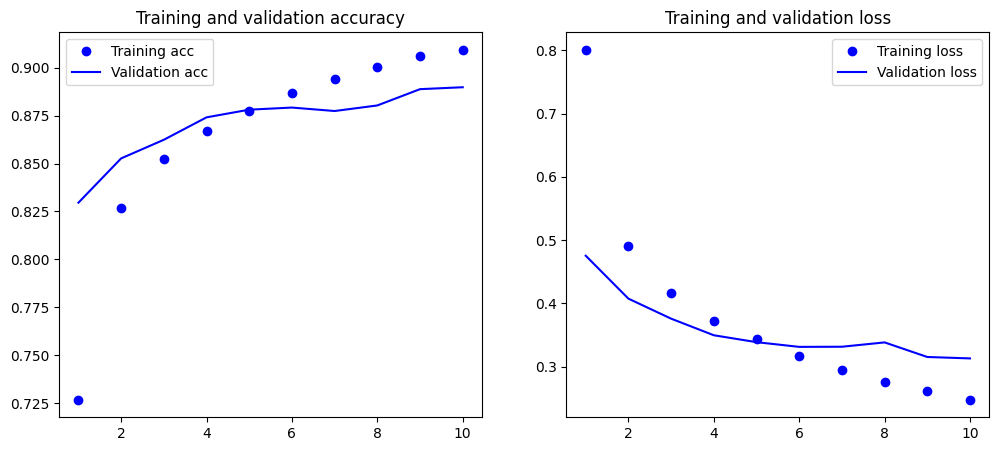

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

plot_training_history(fine_tuned_history)

The model achieved a test accuracy of approximately 88.98%, indicating that it correctly classified nearly 89 out of every 100 samples in the test dataset. This performance suggests that the model is quite effective in distinguishing between the different classes it was trained on. The loss value of 0.3131 reflects the difference between the predicted outputs and the actual labels, with lower values typically signifying better model performance.